# Exploratory Data Analysis: UCI Student Performance

This notebook provides a comprehensive exploratory data analysis of the UCI Student Performance dataset, which contains student performance data from two Portuguese secondary schools.

## Dataset Overview
The dataset contains information about student performance in two subjects:
- **Math course** (`student-mat.csv`): 396 students
- **Portuguese language course** (`student-por.csv`): 650 students
- **382 students** appear in both datasets (can be identified by matching attributes)

### Key Features:
- **Demographics**: school, sex, age, address, family size, parent status
- **Family Background**: mother's/father's education and job, guardian
- **Academic Factors**: study time, past failures, school/family support, paid classes, activities
- **Lifestyle**: internet access, romantic relationship, family relationships, free time, going out, alcohol consumption, health, absences
- **Target Variables**: G1 (first period grade), G2 (second period grade), G3 (final grade, 0-20 scale)


In [1]:
# Install required packages
!pip install -q pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 1.26.4
Matplotlib version: 3.10.1
Seaborn version: 0.13.2


## 1. Data Loading and Initial Inspection


In [3]:
# Load the datasets
# Handle path relative to notebook location or project root
import os

# Try multiple possible paths
base_paths = [
    '../../datasets/uci-student-performance/',  # From pretests/charaka/
    'datasets/uci-student-performance/',        # From project root
    '../datasets/uci-student-performance/'      # From pretests/
]

dataset_dir = None
for path in base_paths:
    if os.path.exists(path):
        dataset_dir = path
        break

if dataset_dir is None:
    raise FileNotFoundError(f"Could not find dataset directory. Tried: {base_paths}")

# Load both datasets (semicolon-separated)
df_math = pd.read_csv(os.path.join(dataset_dir, 'student-mat.csv'), sep=';')
df_por = pd.read_csv(os.path.join(dataset_dir, 'student-por.csv'), sep=';')

print(f"Dataset directory: {os.path.abspath(dataset_dir)}")
print("\n" + "=" * 60)
print("DATASET SHAPES")
print("=" * 60)
print(f"Math dataset: {df_math.shape[0]} rows × {df_math.shape[1]} columns")
print(f"Portuguese dataset: {df_por.shape[0]} rows × {df_por.shape[1]} columns")
print("\n" + "=" * 60)
print("FIRST FEW ROWS - MATH DATASET")
print("=" * 60)
df_math.head(10)


Dataset directory: /Users/charaka/Desktop/Projects/uom-student-performance-analytics/datasets/uci-student-performance

DATASET SHAPES
Math dataset: 395 rows × 33 columns
Portuguese dataset: 649 rows × 33 columns

FIRST FEW ROWS - MATH DATASET


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [4]:
# Display first few rows of Portuguese dataset
print("=" * 60)
print("FIRST FEW ROWS - PORTUGUESE DATASET")
print("=" * 60)
df_por.head(10)


FIRST FEW ROWS - PORTUGUESE DATASET


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


In [5]:
# Display column names and data types
print("=" * 60)
print("COLUMN INFORMATION")
print("=" * 60)
print("\nColumn Names:")
print(df_math.columns.tolist())
print("\n" + "-" * 60)
print("\nData Types (Math):")
print(df_math.dtypes)
print("\n" + "-" * 60)
print("\nDataset Info (Math):")
df_math.info()


COLUMN INFORMATION

Column Names:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

------------------------------------------------------------

Data Types (Math):
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc      

In [6]:
# Check for missing values in both datasets
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

for name, df in [("Math", df_math), ("Portuguese", df_por)]:
    print(f"\n{name} Dataset:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Percentage': missing_percent
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) > 0:
        print(missing_df)
    else:
        print("✓ No missing values found!")


MISSING VALUES ANALYSIS

Math Dataset:
✓ No missing values found!

Portuguese Dataset:
✓ No missing values found!


In [7]:
# Check for duplicate rows
print("=" * 60)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 60)

for name, df in [("Math", df_math), ("Portuguese", df_por)]:
    print(f"\n{name} Dataset:")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")
    if duplicates > 0:
        print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")
    else:
        print("✓ No duplicate rows found!")


DUPLICATE ROWS ANALYSIS

Math Dataset:
Number of duplicate rows: 0
✓ No duplicate rows found!

Portuguese Dataset:
Number of duplicate rows: 0
✓ No duplicate rows found!


In [8]:
# Identify overlapping students (382 students appear in both datasets)
# According to the R script, students are matched by these attributes:
merge_keys = ["school", "sex", "age", "address", "famsize", "Pstatus", 
              "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

# Merge to find common students
df_merged = pd.merge(df_math, df_por, on=merge_keys, how='inner', suffixes=('_math', '_por'))
print("=" * 60)
print("OVERLAPPING STUDENTS ANALYSIS")
print("=" * 60)
print(f"Number of students in both datasets: {len(df_merged)}")
print(f"Math-only students: {len(df_math) - len(df_merged)}")
print(f"Portuguese-only students: {len(df_por) - len(df_merged)}")
print(f"\nSample of merged data (showing key attributes):")
df_merged[merge_keys + ['G3_math', 'G3_por']].head(10)


OVERLAPPING STUDENTS ANALYSIS
Number of students in both datasets: 382
Math-only students: 13
Portuguese-only students: 267

Sample of merged data (showing key attributes):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,internet,G3_math,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,yes,no,6,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,no,yes,6,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,yes,yes,10,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,yes,yes,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,yes,no,10,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,yes,yes,15,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,yes,yes,11,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,yes,no,6,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,yes,yes,19,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,yes,yes,15,13


## 2. Data Cleaning and Preprocessing


In [9]:
# Create clean copies for analysis
df_math_clean = df_math.copy()
df_por_clean = df_por.copy()

# Add subject identifier
df_math_clean['subject'] = 'Math'
df_por_clean['subject'] = 'Portuguese'

# Combine both datasets for unified analysis
df_combined = pd.concat([df_math_clean, df_por_clean], ignore_index=True)

print("=" * 60)
print("COMBINED DATASET")
print("=" * 60)
print(f"Total rows: {len(df_combined)}")
print(f"Math: {len(df_math_clean)} rows")
print(f"Portuguese: {len(df_por_clean)} rows")
print(f"\nFirst few rows of combined dataset:")
df_combined.head()


COMBINED DATASET
Total rows: 1044
Math: 395 rows
Portuguese: 649 rows

First few rows of combined dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Math


In [10]:
# Separate numerical and categorical columns
# Based on the dataset description
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                  'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                  'absences', 'G1', 'G2', 'G3']

categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                    'nursery', 'higher', 'internet', 'romantic', 'subject']

# Ensure we only include columns that exist
numerical_cols = [col for col in numerical_cols if col in df_combined.columns]
categorical_cols = [col for col in categorical_cols if col in df_combined.columns]

print("=" * 60)
print("COLUMN CATEGORIZATION")
print("=" * 60)
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"\nTarget variables: G1, G2, G3 (grades on 0-20 scale)")


COLUMN CATEGORIZATION
Numerical columns (16): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Categorical columns (18): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']

Target variables: G1, G2, G3 (grades on 0-20 scale)


In [11]:
# Display unique values for categorical columns
print("=" * 60)
print("CATEGORICAL COLUMNS - UNIQUE VALUES")
print("=" * 60)

for col in categorical_cols[:10]:  # Show first 10 to avoid too much output
    if col in df_combined.columns:
        unique_vals = df_combined[col].unique()
        print(f"\n{col}:")
        print(f"  Unique values ({len(unique_vals)}): {sorted(unique_vals)}")
        print(f"  Value counts:")
        print(df_combined[col].value_counts())


CATEGORICAL COLUMNS - UNIQUE VALUES

school:
  Unique values (2): ['GP', 'MS']
  Value counts:
school
GP    772
MS    272
Name: count, dtype: int64

sex:
  Unique values (2): ['F', 'M']
  Value counts:
sex
F    591
M    453
Name: count, dtype: int64

address:
  Unique values (2): ['R', 'U']
  Value counts:
address
U    759
R    285
Name: count, dtype: int64

famsize:
  Unique values (2): ['GT3', 'LE3']
  Value counts:
famsize
GT3    738
LE3    306
Name: count, dtype: int64

Pstatus:
  Unique values (2): ['A', 'T']
  Value counts:
Pstatus
T    923
A    121
Name: count, dtype: int64

Mjob:
  Unique values (5): ['at_home', 'health', 'other', 'services', 'teacher']
  Value counts:
Mjob
other       399
services    239
at_home     194
teacher     130
health       82
Name: count, dtype: int64

Fjob:
  Unique values (5): ['at_home', 'health', 'other', 'services', 'teacher']
  Value counts:
Fjob
other       584
services    292
teacher      65
at_home      62
health       41
Name: count, dtype: 

## 3. Statistical Summary


In [12]:
# Statistical summary for numerical columns
print("=" * 60)
print("STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 60)
print("\nCombined Dataset:")
print(df_combined[numerical_cols].describe())


STATISTICAL SUMMARY - NUMERICAL COLUMNS

Combined Dataset:
               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.1

In [13]:
# Statistical summary by subject
print("=" * 60)
print("STATISTICAL SUMMARY BY SUBJECT")
print("=" * 60)

for subject in ['Math', 'Portuguese']:
    print(f"\n{subject} Dataset:")
    df_subject = df_combined[df_combined['subject'] == subject]
    print(df_subject[numerical_cols].describe())


STATISTICAL SUMMARY BY SUBJECT

Math Dataset:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291

## 4. Univariate Analysis


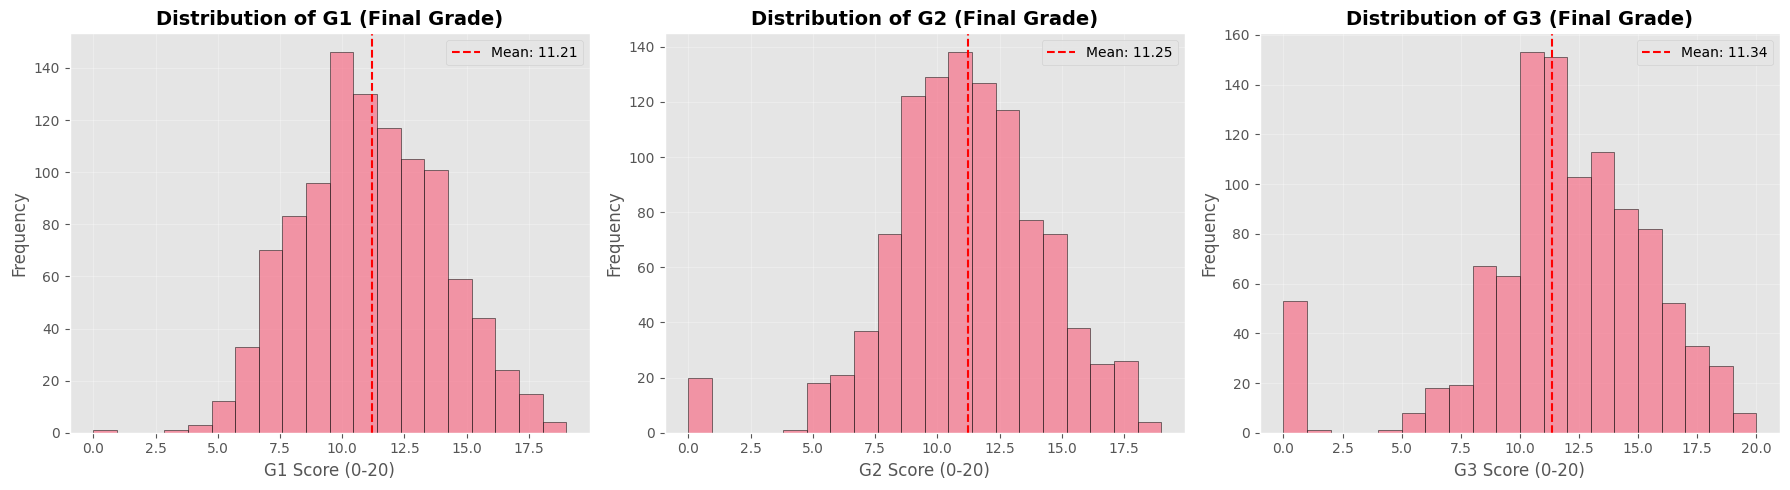

GRADE STATISTICS

G1:
  Mean: 11.21
  Median: 11.00
  Std Dev: 2.98
  Min: 0
  Max: 19

G2:
  Mean: 11.25
  Median: 11.00
  Std Dev: 3.29
  Min: 0
  Max: 19

G3:
  Mean: 11.34
  Median: 11.00
  Std Dev: 3.86
  Min: 0
  Max: 20


In [14]:
# Distribution of target variables (G1, G2, G3)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, grade in enumerate(['G1', 'G2', 'G3']):
    axes[idx].hist(df_combined[grade], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {grade} (Final Grade)', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(f'{grade} Score (0-20)', fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
    axes[idx].axvline(df_combined[grade].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df_combined[grade].mean():.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("=" * 60)
print("GRADE STATISTICS")
print("=" * 60)
for grade in ['G1', 'G2', 'G3']:
    print(f"\n{grade}:")
    print(f"  Mean: {df_combined[grade].mean():.2f}")
    print(f"  Median: {df_combined[grade].median():.2f}")
    print(f"  Std Dev: {df_combined[grade].std():.2f}")
    print(f"  Min: {df_combined[grade].min()}")
    print(f"  Max: {df_combined[grade].max()}")


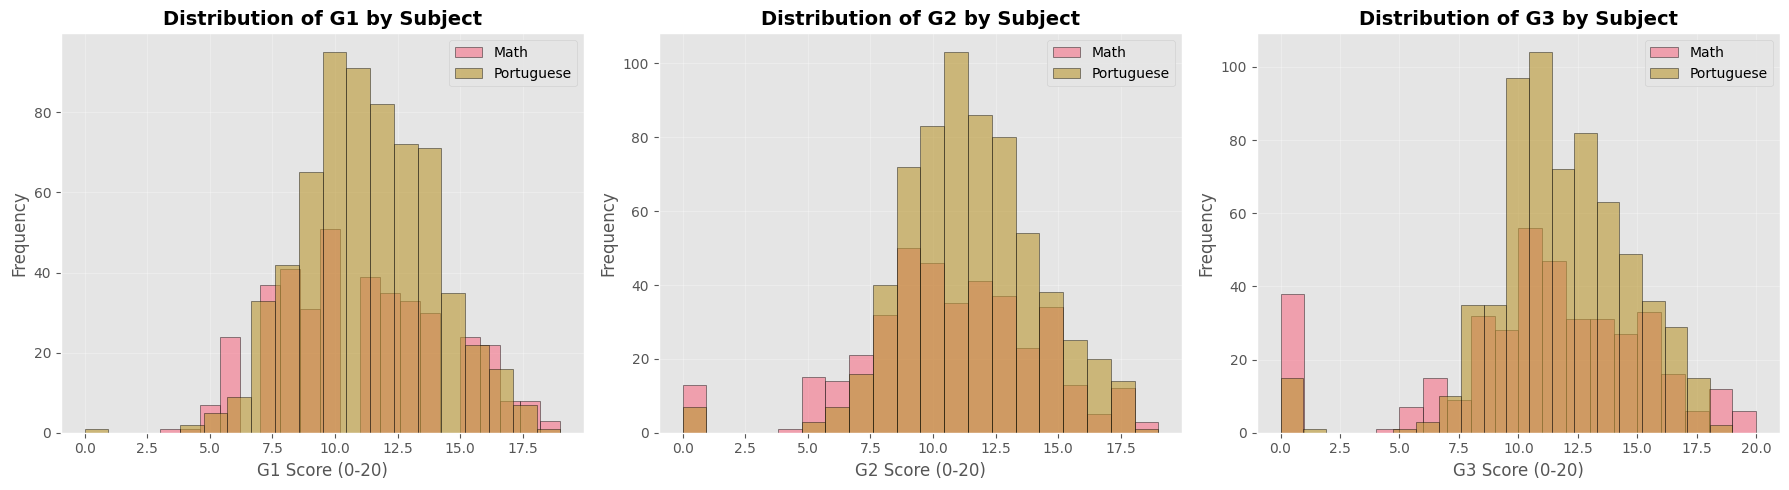

In [15]:
# Grade distribution by subject
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, grade in enumerate(['G1', 'G2', 'G3']):
    for subject in ['Math', 'Portuguese']:
        data = df_combined[df_combined['subject'] == subject][grade]
        axes[idx].hist(data, bins=20, alpha=0.6, label=subject, edgecolor='black')
    
    axes[idx].set_title(f'Distribution of {grade} by Subject', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(f'{grade} Score (0-20)', fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


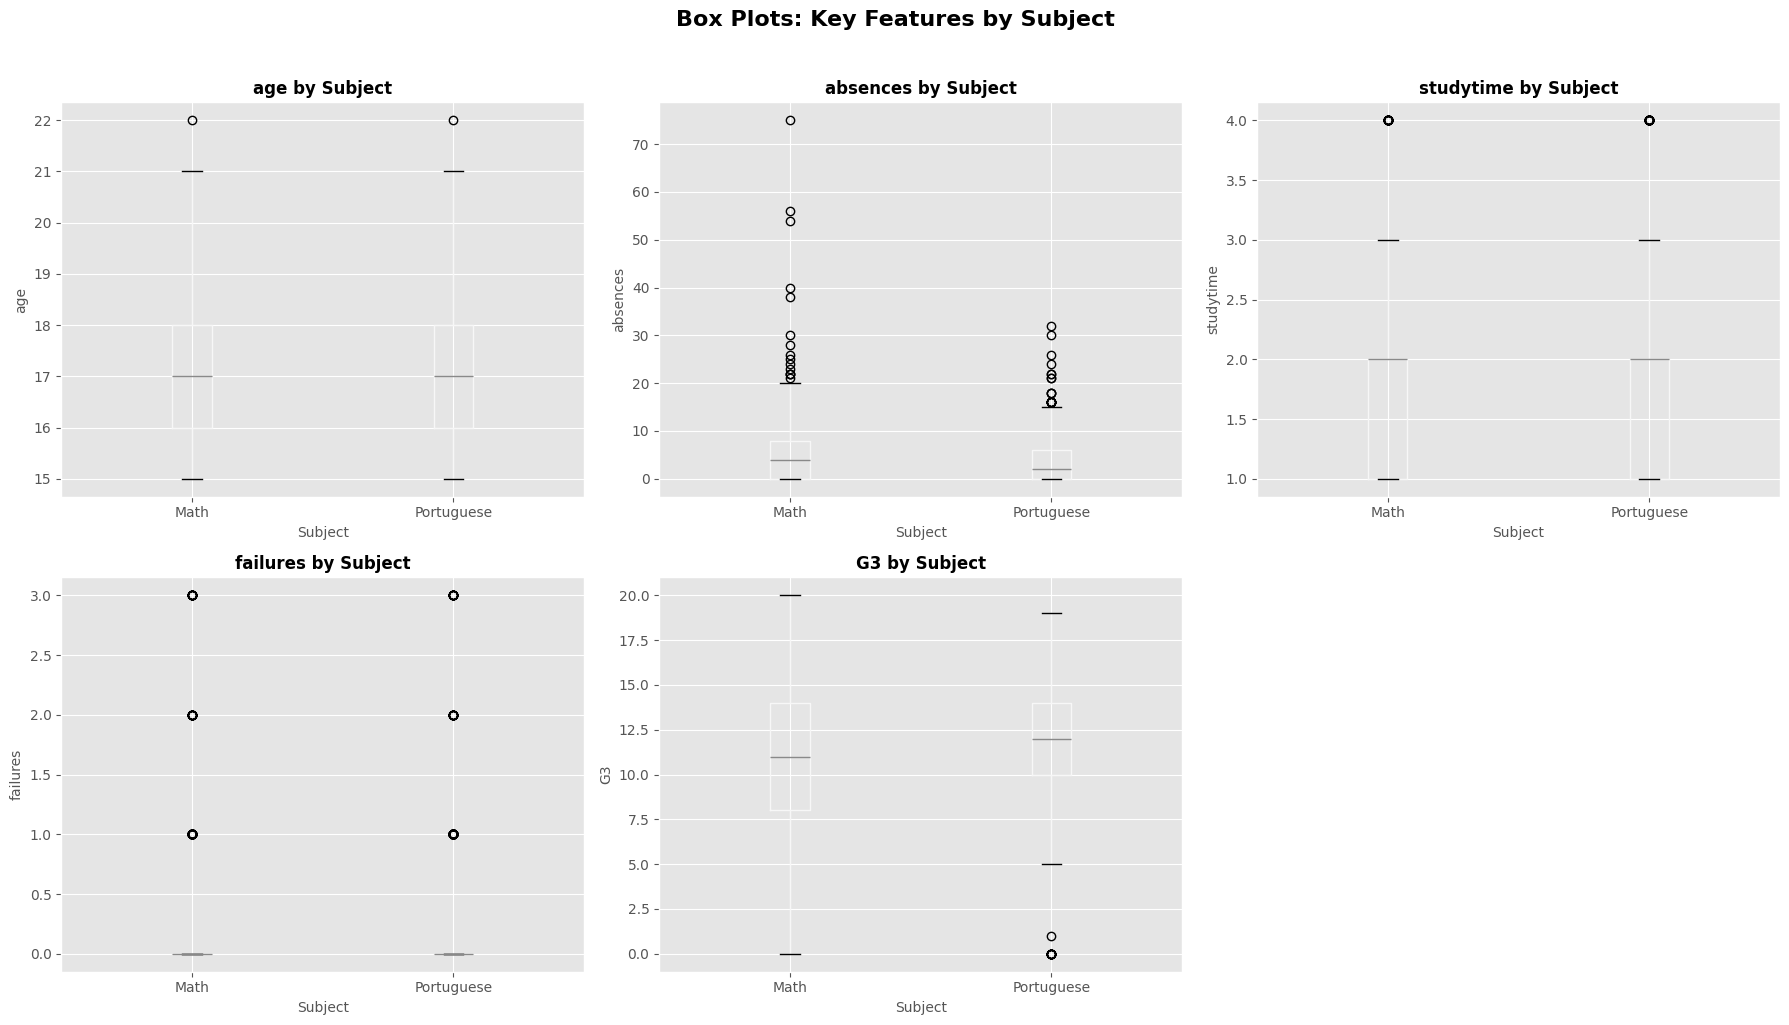

In [16]:
# Box plots for key numerical features
key_features = ['age', 'absences', 'studytime', 'failures', 'G3']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    if feature in df_combined.columns:
        df_combined.boxplot(column=feature, by='subject', ax=axes[idx], grid=True)
        axes[idx].set_title(f'{feature} by Subject', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Subject', fontsize=10)
        axes[idx].set_ylabel(feature, fontsize=10)

# Remove empty subplot
axes[5].remove()

plt.suptitle('Box Plots: Key Features by Subject', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


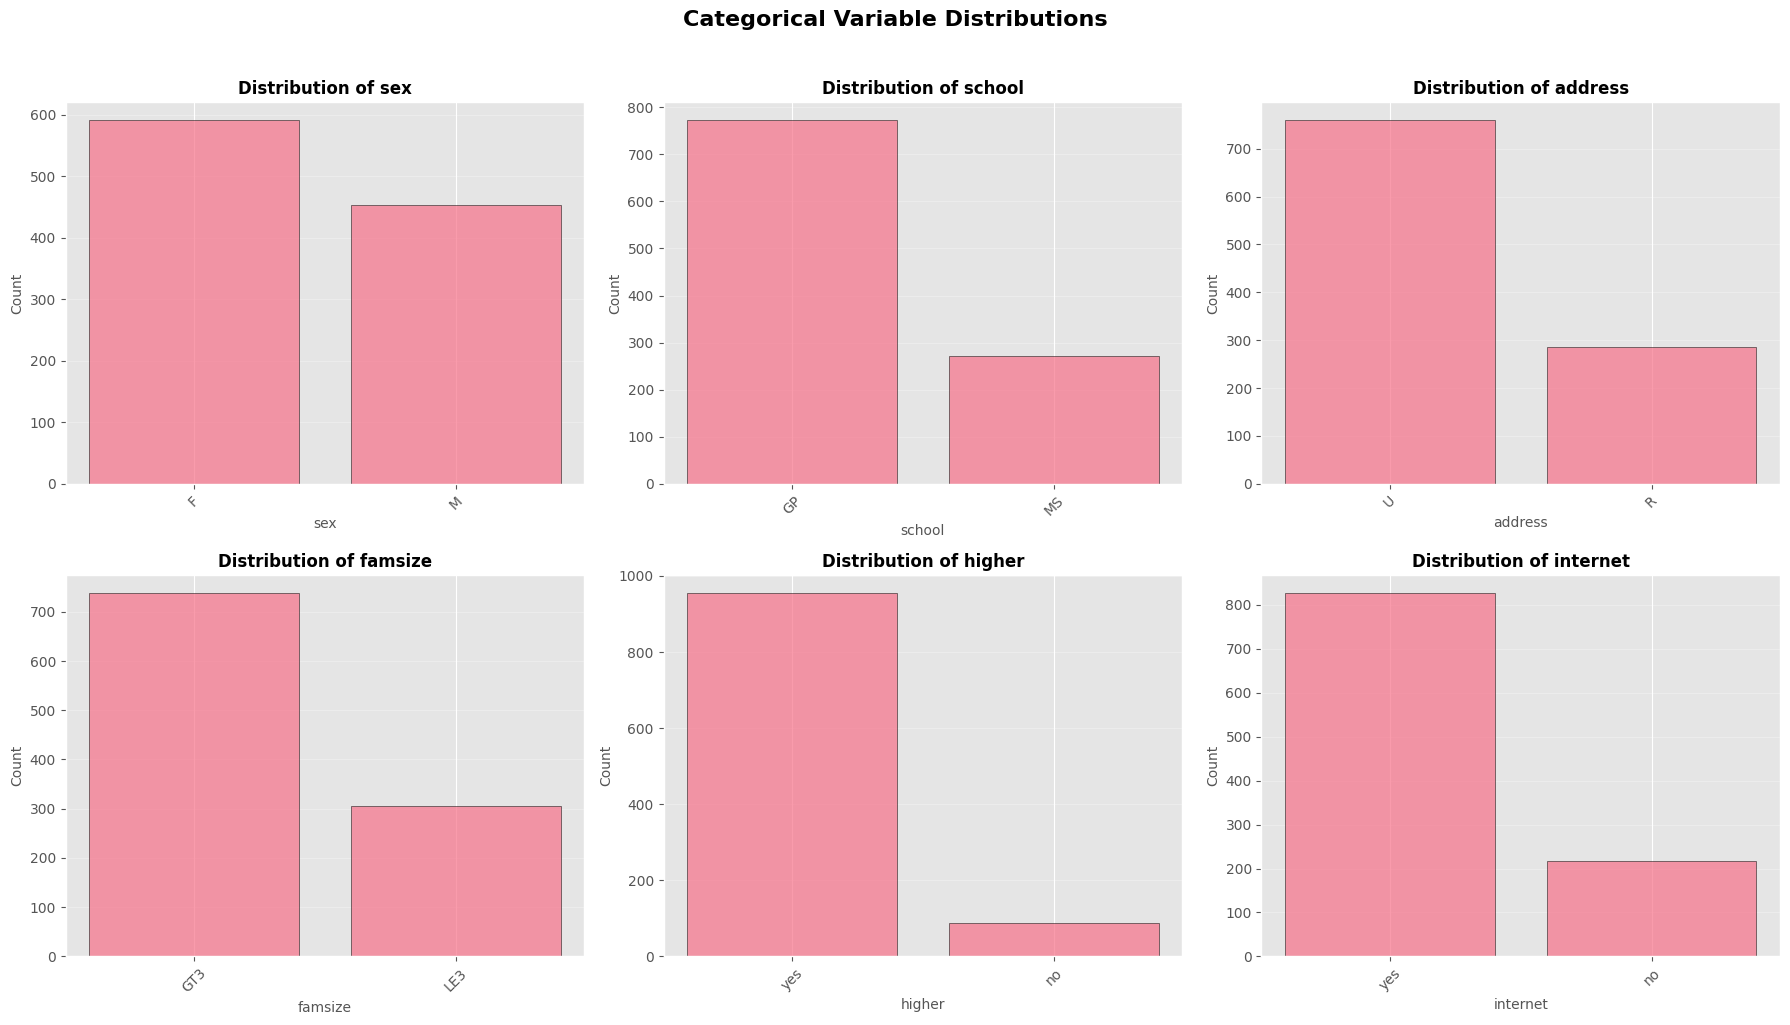

In [17]:
# Categorical variable distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

categorical_to_plot = ['sex', 'school', 'address', 'famsize', 'higher', 'internet']

for idx, col in enumerate(categorical_to_plot):
    if col in df_combined.columns:
        value_counts = df_combined[col].value_counts()
        axes[idx].bar(value_counts.index, value_counts.values, alpha=0.7, edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Categorical Variable Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 5. Bivariate Analysis


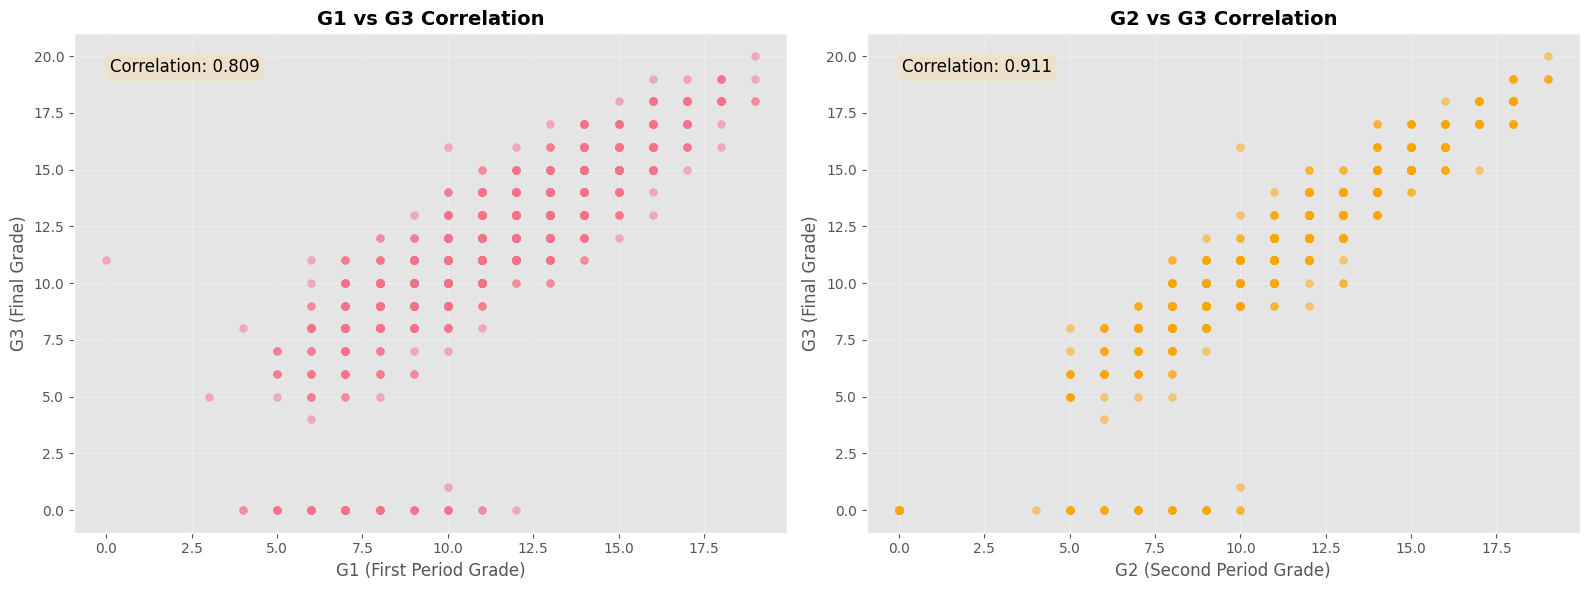

GRADE CORRELATIONS
G1 vs G2: 0.859
G1 vs G3: 0.809
G2 vs G3: 0.911


In [18]:
# Correlation between G1, G2, and G3
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: G1 vs G3
axes[0].scatter(df_combined['G1'], df_combined['G3'], alpha=0.5, s=30)
axes[0].set_xlabel('G1 (First Period Grade)', fontsize=12)
axes[0].set_ylabel('G3 (Final Grade)', fontsize=12)
axes[0].set_title('G1 vs G3 Correlation', fontsize=14, fontweight='bold')
corr_g1_g3 = df_combined['G1'].corr(df_combined['G3'])
axes[0].text(0.05, 0.95, f'Correlation: {corr_g1_g3:.3f}', 
             transform=axes[0].transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[0].grid(True, alpha=0.3)

# Scatter plot: G2 vs G3
axes[1].scatter(df_combined['G2'], df_combined['G3'], alpha=0.5, s=30, color='orange')
axes[1].set_xlabel('G2 (Second Period Grade)', fontsize=12)
axes[1].set_ylabel('G3 (Final Grade)', fontsize=12)
axes[1].set_title('G2 vs G3 Correlation', fontsize=14, fontweight='bold')
corr_g2_g3 = df_combined['G2'].corr(df_combined['G3'])
axes[1].text(0.05, 0.95, f'Correlation: {corr_g2_g3:.3f}', 
             transform=axes[1].transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 60)
print("GRADE CORRELATIONS")
print("=" * 60)
print(f"G1 vs G2: {df_combined['G1'].corr(df_combined['G2']):.3f}")
print(f"G1 vs G3: {corr_g1_g3:.3f}")
print(f"G2 vs G3: {corr_g2_g3:.3f}")


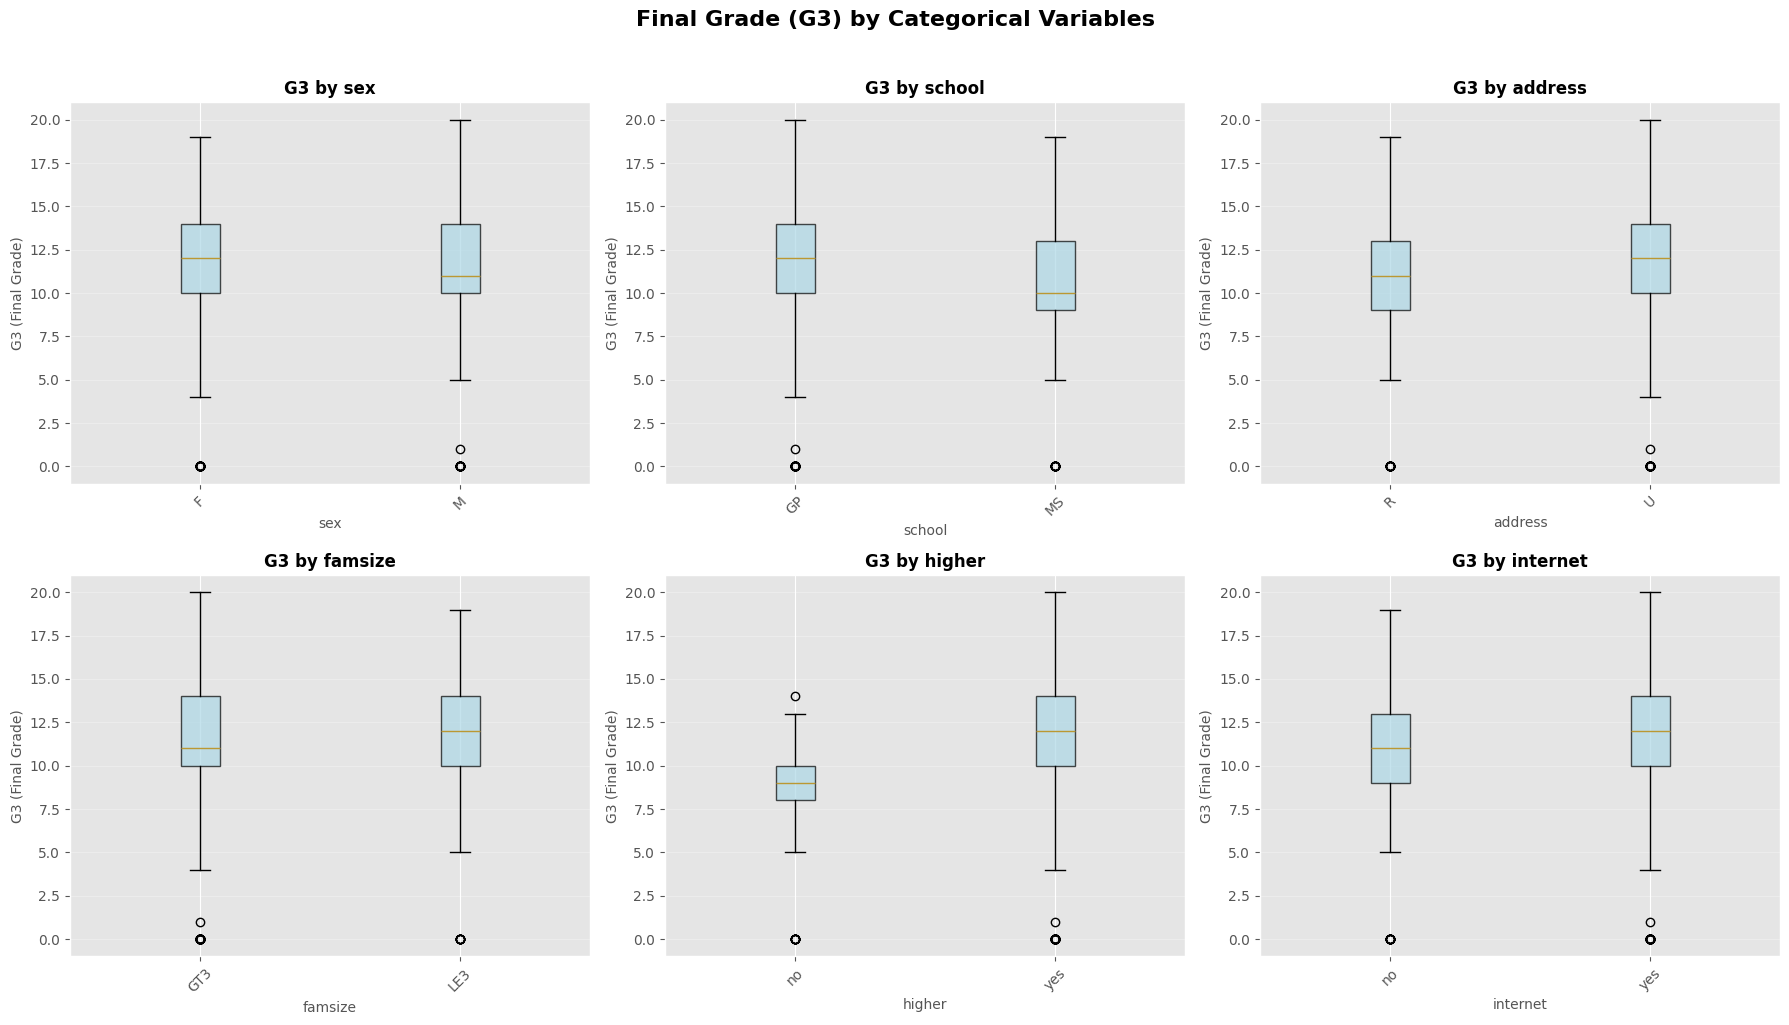

In [19]:
# Final grade (G3) by categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

categorical_vs_grade = ['sex', 'school', 'address', 'famsize', 'higher', 'internet']

for idx, col in enumerate(categorical_vs_grade):
    if col in df_combined.columns:
        data_to_plot = []
        labels = []
        for val in sorted(df_combined[col].unique()):
            data_to_plot.append(df_combined[df_combined[col] == val]['G3'].values)
            labels.append(f"{val}")
        
        bp = axes[idx].boxplot(data_to_plot, labels=labels, patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')
            patch.set_alpha(0.7)
        
        axes[idx].set_title(f'G3 by {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('G3 (Final Grade)', fontsize=10)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Final Grade (G3) by Categorical Variables', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


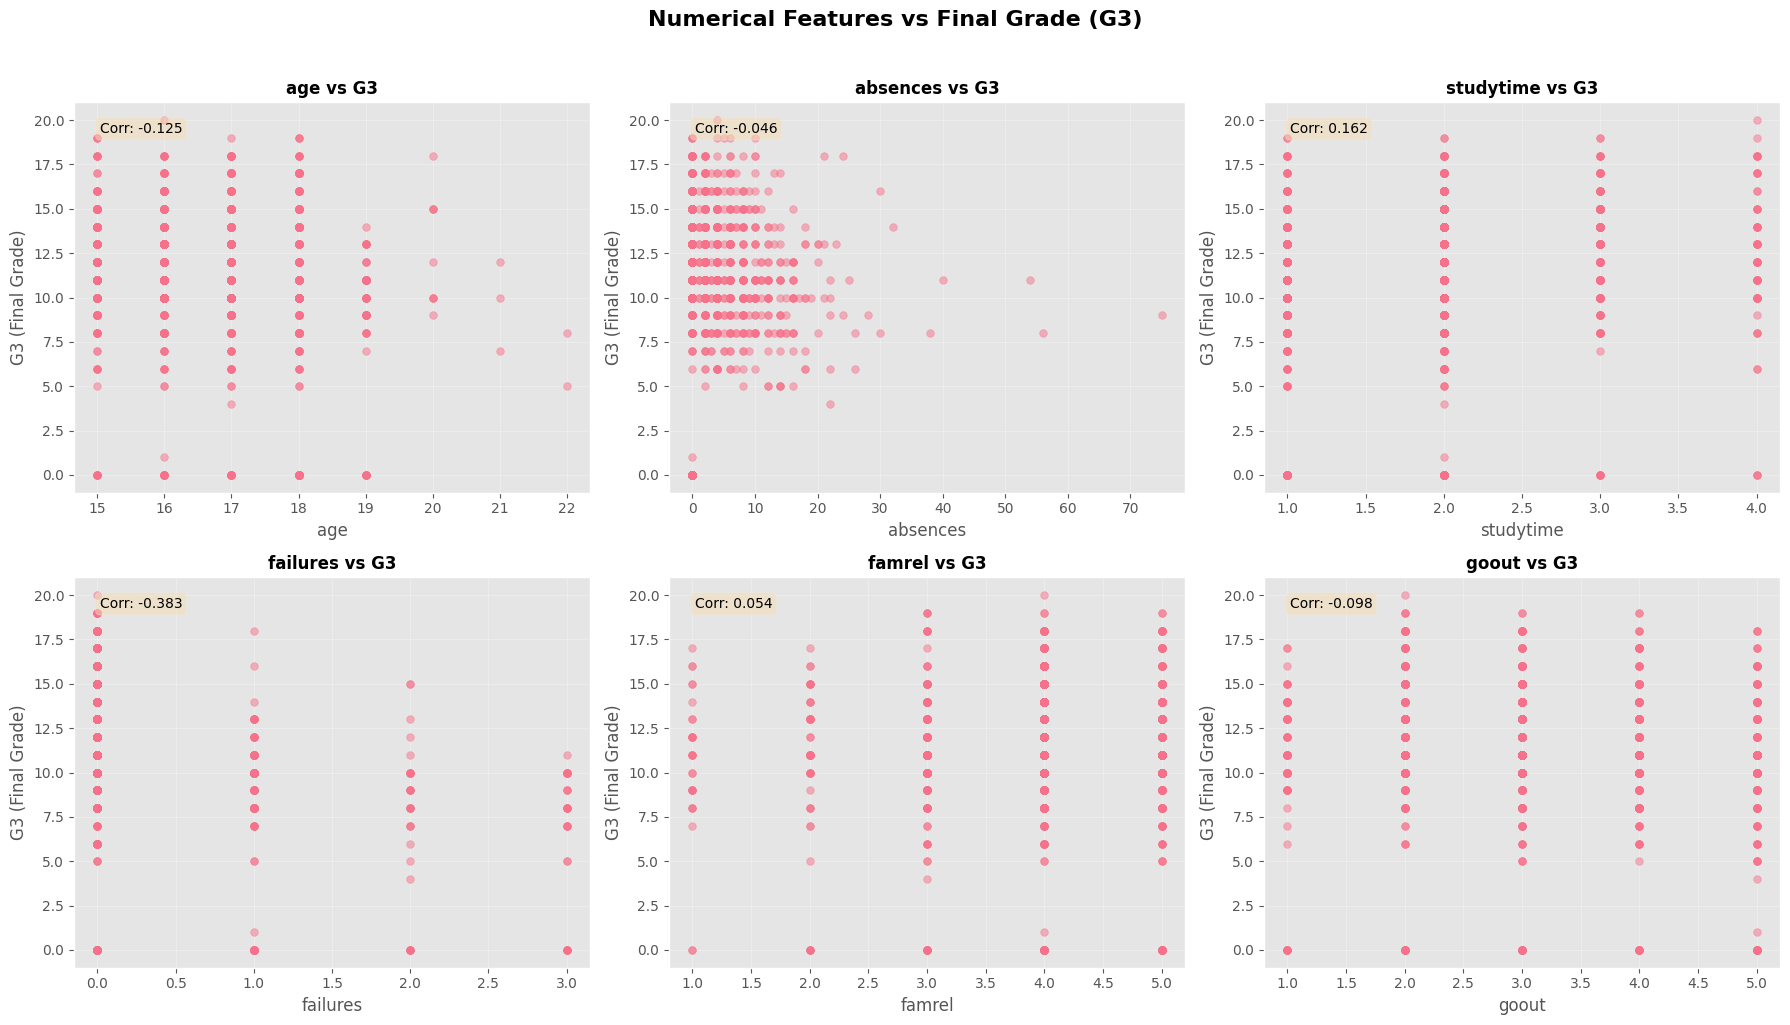

In [20]:
# Relationship between numerical features and G3
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

features_vs_grade = ['age', 'absences', 'studytime', 'failures', 'famrel', 'goout']

for idx, feature in enumerate(features_vs_grade):
    if feature in df_combined.columns:
        axes[idx].scatter(df_combined[feature], df_combined['G3'], alpha=0.5, s=30)
        axes[idx].set_xlabel(feature, fontsize=12)
        axes[idx].set_ylabel('G3 (Final Grade)', fontsize=12)
        axes[idx].set_title(f'{feature} vs G3', fontsize=12, fontweight='bold')
        corr = df_combined[feature].corr(df_combined['G3'])
        axes[idx].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                      transform=axes[idx].transAxes, fontsize=10,
                      verticalalignment='top', 
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        axes[idx].grid(True, alpha=0.3)

plt.suptitle('Numerical Features vs Final Grade (G3)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [21]:
# Average G3 by subject and key categorical variables
print("=" * 60)
print("AVERAGE G3 BY KEY VARIABLES")
print("=" * 60)

key_vars = ['sex', 'school', 'address', 'higher', 'internet', 'paid']

for var in key_vars:
    if var in df_combined.columns:
        print(f"\n{var.upper()}:")
        avg_g3 = df_combined.groupby([var, 'subject'])['G3'].mean().unstack()
        print(avg_g3)
        print(f"Overall by {var}:")
        print(df_combined.groupby(var)['G3'].mean())


AVERAGE G3 BY KEY VARIABLES

SEX:
subject       Math  Portuguese
sex                           
F         9.966346   12.253264
M        10.914439   11.406015
Overall by sex:
sex
F    11.448393
M    11.203091
Name: G3, dtype: float64

SCHOOL:
subject       Math  Portuguese
school                        
GP       10.489971   12.576832
MS        9.847826   10.650442
Overall by school:
school
GP    11.633420
MS    10.514706
Name: G3, dtype: float64

ADDRESS:
subject       Math  Portuguese
address                       
R         9.511364   11.086294
U        10.674267   12.263274
Overall by address:
address
R    10.600000
U    11.620553
Name: G3, dtype: float64

HIGHER:
subject    Math  Portuguese
higher                     
no        6.800    8.797101
yes      10.608   12.275862
Overall by higher:
higher
no      8.348315
yes    11.620942
Name: G3, dtype: float64

INTERNET:
subject        Math  Portuguese
internet                       
no         9.409091   11.026490
yes       10.617021  

## 6. Multivariate Analysis


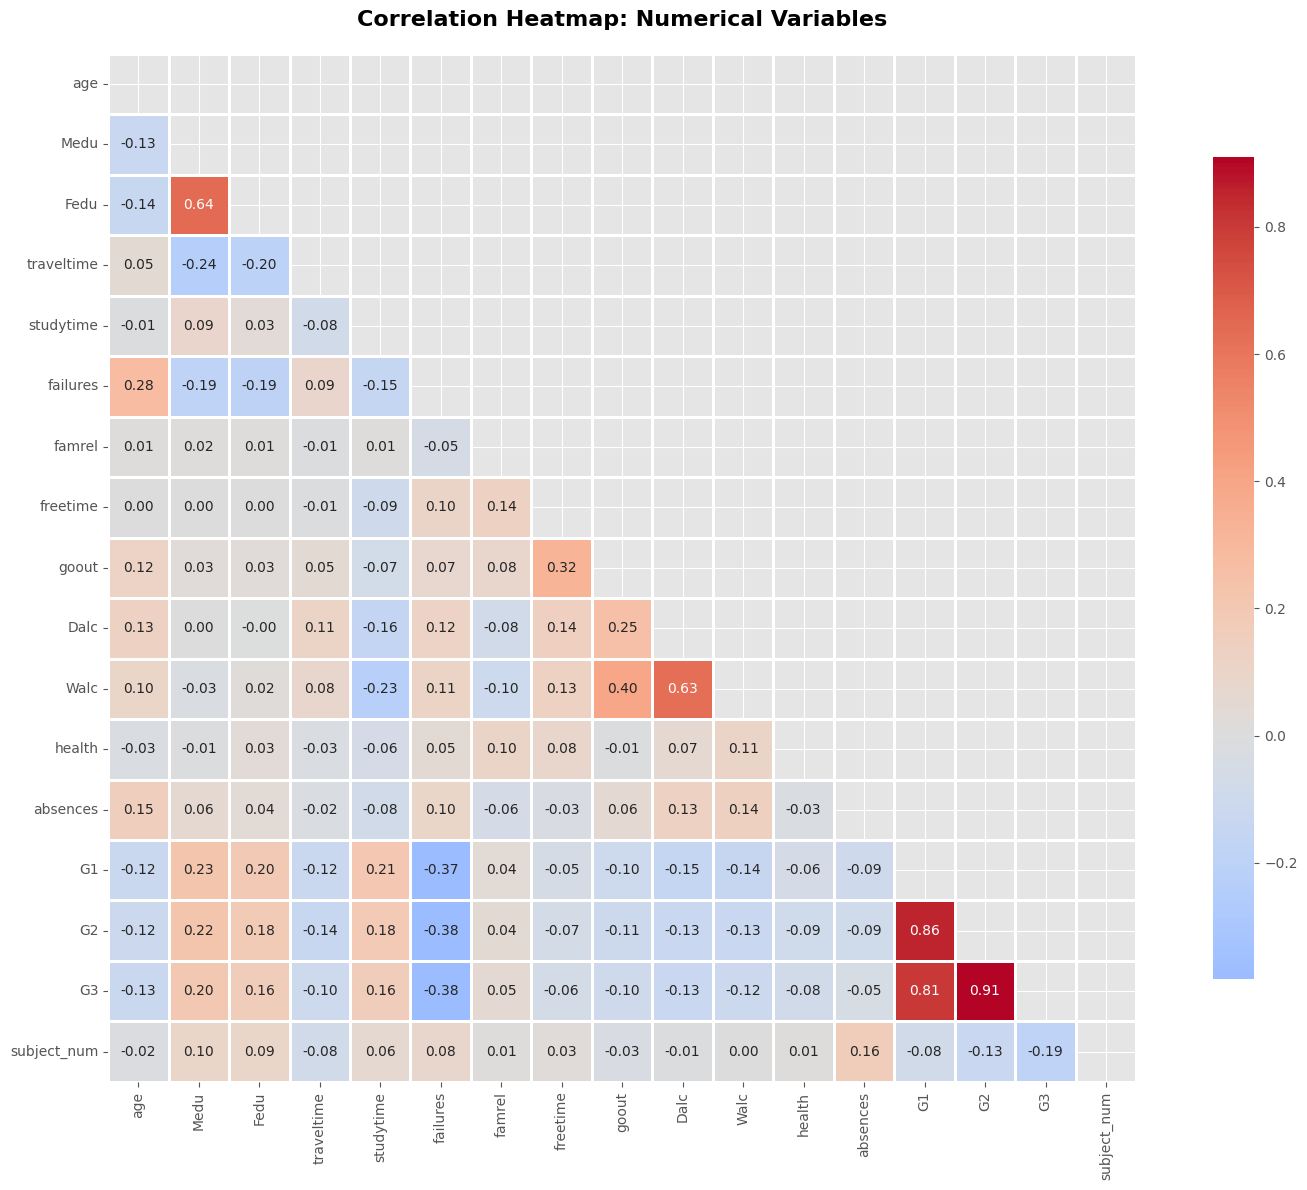

TOP CORRELATIONS WITH G3 (Final Grade)
G2             0.910743
G1             0.809142
Medu           0.201472
studytime      0.161629
Fedu           0.159796
famrel         0.054461
absences      -0.045671
freetime      -0.064890
health        -0.080079
goout         -0.097877
traveltime    -0.102627
Walc          -0.115740
age           -0.125282
Dalc          -0.129642
subject_num   -0.187166
failures      -0.383145
Name: G3, dtype: float64


In [22]:
# Correlation heatmap for numerical variables
correlation_cols = numerical_cols + ['subject']
# Convert subject to numeric for correlation
df_corr = df_combined.copy()
df_corr['subject_num'] = df_corr['subject'].map({'Math': 1, 'Portuguese': 0})

# Select only numerical columns for correlation
corr_data = df_corr[numerical_cols + ['subject_num']]

plt.figure(figsize=(16, 12))
correlation_matrix = corr_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Numerical Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print top correlations with G3
print("=" * 60)
print("TOP CORRELATIONS WITH G3 (Final Grade)")
print("=" * 60)
g3_correlations = correlation_matrix['G3'].drop('G3').sort_values(ascending=False)
print(g3_correlations)


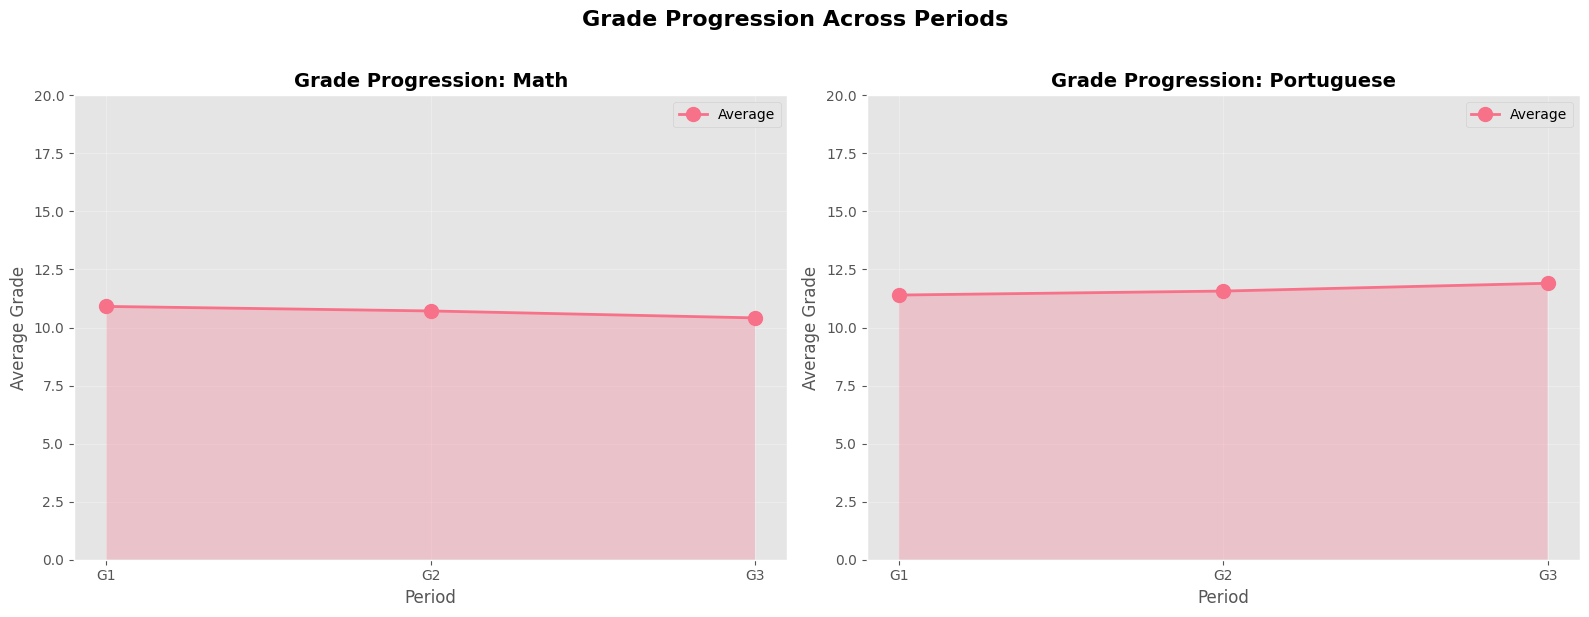

GRADE PROGRESSION STATISTICS

Math:
  G1 Average: 10.91
  G2 Average: 10.71
  G3 Average: 10.42
  G1->G2 Change: -0.19
  G2->G3 Change: -0.30

Portuguese:
  G1 Average: 11.40
  G2 Average: 11.57
  G3 Average: 11.91
  G1->G2 Change: 0.17
  G2->G3 Change: 0.34


In [23]:
# Grade progression: G1 -> G2 -> G3
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, subject in enumerate(['Math', 'Portuguese']):
    df_subj = df_combined[df_combined['subject'] == subject]
    
    # Calculate average grades
    avg_grades = [df_subj['G1'].mean(), df_subj['G2'].mean(), df_subj['G3'].mean()]
    periods = ['G1', 'G2', 'G3']
    
    axes[idx].plot(periods, avg_grades, marker='o', linewidth=2, markersize=10, label='Average')
    axes[idx].fill_between(periods, avg_grades, alpha=0.3)
    axes[idx].set_title(f'Grade Progression: {subject}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Period', fontsize=12)
    axes[idx].set_ylabel('Average Grade', fontsize=12)
    axes[idx].set_ylim([0, 20])
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.suptitle('Grade Progression Across Periods', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print progression statistics
print("=" * 60)
print("GRADE PROGRESSION STATISTICS")
print("=" * 60)
for subject in ['Math', 'Portuguese']:
    df_subj = df_combined[df_combined['subject'] == subject]
    print(f"\n{subject}:")
    print(f"  G1 Average: {df_subj['G1'].mean():.2f}")
    print(f"  G2 Average: {df_subj['G2'].mean():.2f}")
    print(f"  G3 Average: {df_subj['G3'].mean():.2f}")
    print(f"  G1->G2 Change: {df_subj['G2'].mean() - df_subj['G1'].mean():.2f}")
    print(f"  G2->G3 Change: {df_subj['G3'].mean() - df_subj['G2'].mean():.2f}")


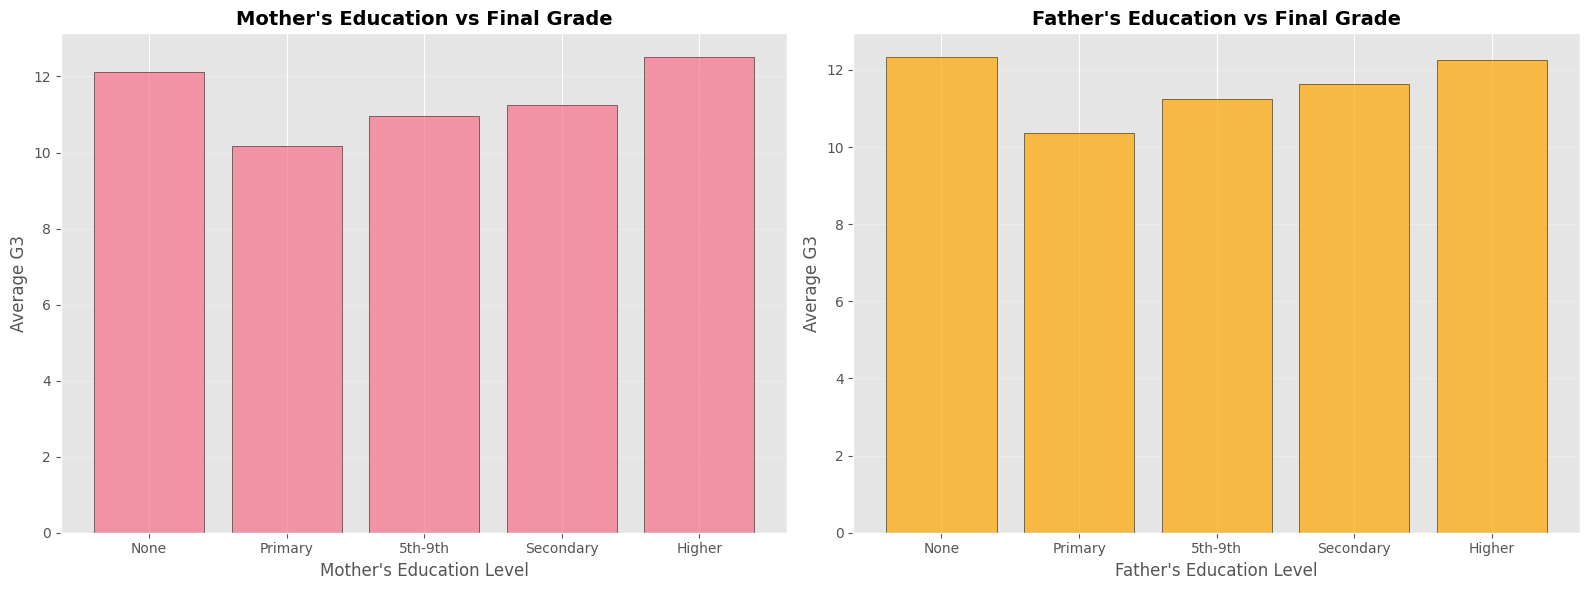

In [24]:
# Family background impact on performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mother's education vs G3
medu_order = sorted(df_combined['Medu'].unique())
medu_avg = df_combined.groupby('Medu')['G3'].mean()
axes[0].bar(medu_order, [medu_avg[x] for x in medu_order], alpha=0.7, edgecolor='black')
axes[0].set_xlabel("Mother's Education Level", fontsize=12)
axes[0].set_ylabel('Average G3', fontsize=12)
axes[0].set_title("Mother's Education vs Final Grade", fontsize=14, fontweight='bold')
axes[0].set_xticks(medu_order)
axes[0].set_xticklabels(['None', 'Primary', '5th-9th', 'Secondary', 'Higher'])
axes[0].grid(True, alpha=0.3, axis='y')

# Father's education vs G3
fedu_order = sorted(df_combined['Fedu'].unique())
fedu_avg = df_combined.groupby('Fedu')['G3'].mean()
axes[1].bar(fedu_order, [fedu_avg[x] for x in fedu_order], alpha=0.7, edgecolor='black', color='orange')
axes[1].set_xlabel("Father's Education Level", fontsize=12)
axes[1].set_ylabel('Average G3', fontsize=12)
axes[1].set_title("Father's Education vs Final Grade", fontsize=14, fontweight='bold')
axes[1].set_xticks(fedu_order)
axes[1].set_xticklabels(['None', 'Primary', '5th-9th', 'Secondary', 'Higher'])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


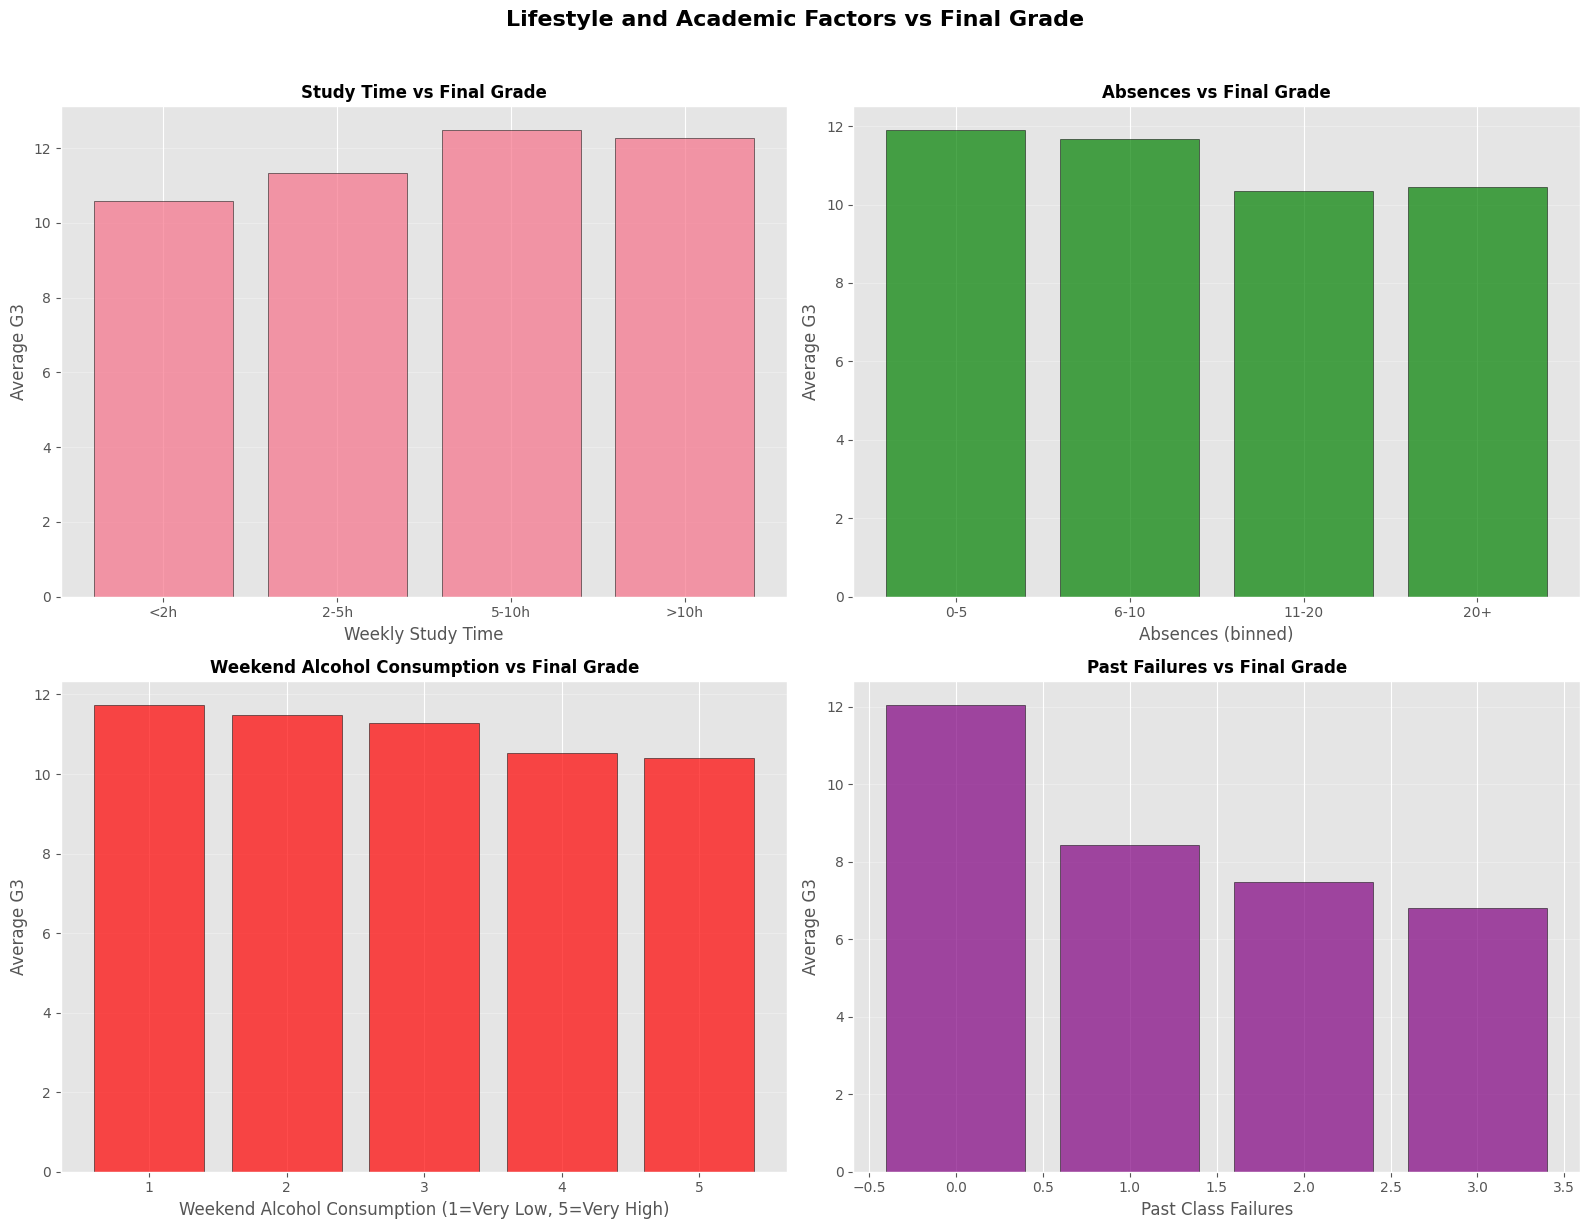

In [25]:
# Lifestyle factors impact
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Study time vs G3
studytime_order = sorted(df_combined['studytime'].unique())
studytime_avg = df_combined.groupby('studytime')['G3'].mean()
axes[0, 0].bar(studytime_order, [studytime_avg[x] for x in studytime_order], 
               alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Weekly Study Time', fontsize=12)
axes[0, 0].set_ylabel('Average G3', fontsize=12)
axes[0, 0].set_title('Study Time vs Final Grade', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(studytime_order)
axes[0, 0].set_xticklabels(['<2h', '2-5h', '5-10h', '>10h'])
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Absences vs G3 (binned)
df_combined['absences_binned'] = pd.cut(df_combined['absences'], 
                                        bins=[0, 5, 10, 20, 100], 
                                        labels=['0-5', '6-10', '11-20', '20+'])
absences_avg = df_combined.groupby('absences_binned')['G3'].mean()
axes[0, 1].bar(range(len(absences_avg)), absences_avg.values, alpha=0.7, edgecolor='black', color='green')
axes[0, 1].set_xlabel('Absences (binned)', fontsize=12)
axes[0, 1].set_ylabel('Average G3', fontsize=12)
axes[0, 1].set_title('Absences vs Final Grade', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(len(absences_avg)))
axes[0, 1].set_xticklabels(absences_avg.index)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Alcohol consumption (weekend) vs G3
walc_order = sorted(df_combined['Walc'].unique())
walc_avg = df_combined.groupby('Walc')['G3'].mean()
axes[1, 0].bar(walc_order, [walc_avg[x] for x in walc_order], alpha=0.7, edgecolor='black', color='red')
axes[1, 0].set_xlabel('Weekend Alcohol Consumption (1=Very Low, 5=Very High)', fontsize=12)
axes[1, 0].set_ylabel('Average G3', fontsize=12)
axes[1, 0].set_title('Weekend Alcohol Consumption vs Final Grade', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Failures vs G3
failures_order = sorted(df_combined['failures'].unique())
failures_avg = df_combined.groupby('failures')['G3'].mean()
axes[1, 1].bar(failures_order, [failures_avg[x] for x in failures_order], 
               alpha=0.7, edgecolor='black', color='purple')
axes[1, 1].set_xlabel('Past Class Failures', fontsize=12)
axes[1, 1].set_ylabel('Average G3', fontsize=12)
axes[1, 1].set_title('Past Failures vs Final Grade', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('Lifestyle and Academic Factors vs Final Grade', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 7. Key Insights and Summary


In [26]:
# Summary statistics and key findings
print("=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)

print("\n1. DATASET OVERVIEW:")
print(f"   - Math students: {len(df_math)}")
print(f"   - Portuguese students: {len(df_por)}")
print(f"   - Students in both: {len(df_merged)}")
print(f"   - Total records: {len(df_combined)}")

print("\n2. GRADE STATISTICS:")
print(f"   - G1 (First Period) - Mean: {df_combined['G1'].mean():.2f}, Std: {df_combined['G1'].std():.2f}")
print(f"   - G2 (Second Period) - Mean: {df_combined['G2'].mean():.2f}, Std: {df_combined['G2'].std():.2f}")
print(f"   - G3 (Final Grade) - Mean: {df_combined['G3'].mean():.2f}, Std: {df_combined['G3'].std():.2f}")

print("\n3. GRADE CORRELATIONS:")
print(f"   - G1 vs G2: {df_combined['G1'].corr(df_combined['G2']):.3f}")
print(f"   - G1 vs G3: {df_combined['G1'].corr(df_combined['G3']):.3f}")
print(f"   - G2 vs G3: {df_combined['G2'].corr(df_combined['G3']):.3f}")

print("\n4. SUBJECT COMPARISON:")
for subject in ['Math', 'Portuguese']:
    df_subj = df_combined[df_combined['subject'] == subject]
    print(f"   {subject}:")
    print(f"     - Average G3: {df_subj['G3'].mean():.2f}")
    print(f"     - Students: {len(df_subj)}")

print("\n5. TOP FACTORS CORRELATED WITH G3:")
g3_corr_sorted = correlation_matrix['G3'].drop('G3').abs().sort_values(ascending=False)
print("   Top 5 positive correlations:")
for idx, (var, corr) in enumerate(g3_corr_sorted.head(5).items(), 1):
    actual_corr = correlation_matrix.loc[var, 'G3']
    print(f"     {idx}. {var}: {actual_corr:.3f}")

print("\n6. DEMOGRAPHIC BREAKDOWN:")
print(f"   - Gender distribution: {df_combined['sex'].value_counts().to_dict()}")
print(f"   - School distribution: {df_combined['school'].value_counts().to_dict()}")
print(f"   - Address distribution: {df_combined['address'].value_counts().to_dict()}")

print("\n7. ACADEMIC SUPPORT:")
print(f"   - Students with family support: {df_combined['famsup'].value_counts().get('yes', 0)}")
print(f"   - Students with school support: {df_combined['schoolsup'].value_counts().get('yes', 0)}")
print(f"   - Students with paid classes: {df_combined['paid'].value_counts().get('yes', 0)}")
print(f"   - Students wanting higher education: {df_combined['higher'].value_counts().get('yes', 0)}")


KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   - Math students: 395
   - Portuguese students: 649
   - Students in both: 382
   - Total records: 1044

2. GRADE STATISTICS:
   - G1 (First Period) - Mean: 11.21, Std: 2.98
   - G2 (Second Period) - Mean: 11.25, Std: 3.29
   - G3 (Final Grade) - Mean: 11.34, Std: 3.86

3. GRADE CORRELATIONS:
   - G1 vs G2: 0.859
   - G1 vs G3: 0.809
   - G2 vs G3: 0.911

4. SUBJECT COMPARISON:
   Math:
     - Average G3: 10.42
     - Students: 395
   Portuguese:
     - Average G3: 11.91
     - Students: 649

5. TOP FACTORS CORRELATED WITH G3:
   Top 5 positive correlations:
     1. G2: 0.911
     2. G1: 0.809
     3. failures: -0.383
     4. Medu: 0.201
     5. subject_num: -0.187

6. DEMOGRAPHIC BREAKDOWN:
   - Gender distribution: {'F': 591, 'M': 453}
   - School distribution: {'GP': 772, 'MS': 272}
   - Address distribution: {'U': 759, 'R': 285}

7. ACADEMIC SUPPORT:
   - Students with family support: 640
   - Students with school support: 119
   - Stude

OVERLAPPING STUDENTS ANALYSIS

Number of students in both datasets: 382

Grade Comparison (Math vs Portuguese):
  Math G3 - Mean: 10.39, Std: 4.69
  Portuguese G3 - Mean: 12.52, Std: 2.95
  Difference (Math - Portuguese): -2.13


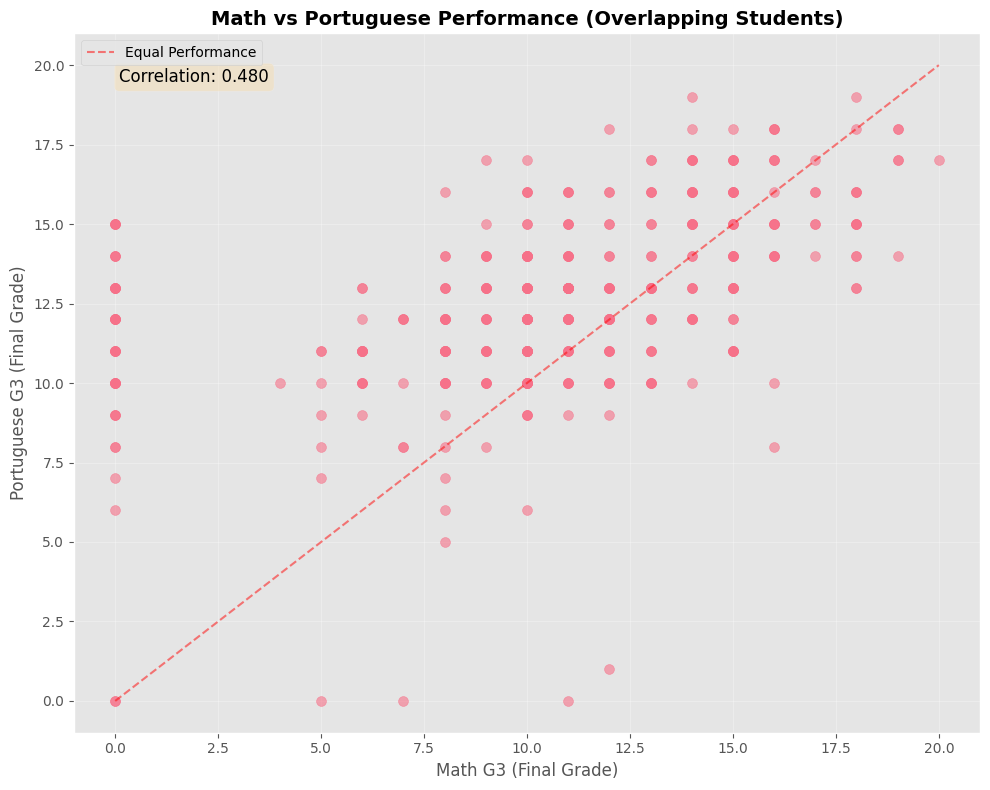


Performance Comparison:
  Better in Math: 95 students (24.9%)
  Better in Portuguese: 249 students (65.2%)
  Equal performance: 38 students (9.9%)


In [27]:
# Analysis of overlapping students
if len(df_merged) > 0:
    print("=" * 60)
    print("OVERLAPPING STUDENTS ANALYSIS")
    print("=" * 60)
    
    print(f"\nNumber of students in both datasets: {len(df_merged)}")
    print(f"\nGrade Comparison (Math vs Portuguese):")
    print(f"  Math G3 - Mean: {df_merged['G3_math'].mean():.2f}, Std: {df_merged['G3_math'].std():.2f}")
    print(f"  Portuguese G3 - Mean: {df_merged['G3_por'].mean():.2f}, Std: {df_merged['G3_por'].std():.2f}")
    print(f"  Difference (Math - Portuguese): {df_merged['G3_math'].mean() - df_merged['G3_por'].mean():.2f}")
    
    # Scatter plot: Math G3 vs Portuguese G3
    plt.figure(figsize=(10, 8))
    plt.scatter(df_merged['G3_math'], df_merged['G3_por'], alpha=0.6, s=50)
    plt.xlabel('Math G3 (Final Grade)', fontsize=12)
    plt.ylabel('Portuguese G3 (Final Grade)', fontsize=12)
    plt.title('Math vs Portuguese Performance (Overlapping Students)', fontsize=14, fontweight='bold')
    
    # Add diagonal line
    min_grade = min(df_merged['G3_math'].min(), df_merged['G3_por'].min())
    max_grade = max(df_merged['G3_math'].max(), df_merged['G3_por'].max())
    plt.plot([min_grade, max_grade], [min_grade, max_grade], 'r--', alpha=0.5, label='Equal Performance')
    
    corr_overlap = df_merged['G3_math'].corr(df_merged['G3_por'])
    plt.text(0.05, 0.95, f'Correlation: {corr_overlap:.3f}', 
             transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Students who perform better in one subject
    better_math = len(df_merged[df_merged['G3_math'] > df_merged['G3_por']])
    better_por = len(df_merged[df_merged['G3_por'] > df_merged['G3_math']])
    equal = len(df_merged[df_merged['G3_math'] == df_merged['G3_por']])
    
    print(f"\nPerformance Comparison:")
    print(f"  Better in Math: {better_math} students ({better_math/len(df_merged)*100:.1f}%)")
    print(f"  Better in Portuguese: {better_por} students ({better_por/len(df_merged)*100:.1f}%)")
    print(f"  Equal performance: {equal} students ({equal/len(df_merged)*100:.1f}%)")
else:
    print("No overlapping students found.")
